In [2]:
from card_rl import CardGameEnv, rank_of

In [12]:
# Run a greedy agent that always plays the highest-rank card.
# This cell prints the cards played in each trick as the game progresses.
# The environment prints the growing trick after each card is played.

env = CardGameEnv()
obs = env.reset()
done = False
total_reward = 0.0
trick_no = 1

while not done:
    hand = obs['hand']
    # Label the upcoming trick; the env will print cards as they are played.
    print(f"=== Trick {trick_no} ===")

    # Always play the highest-rank card (suit-agnostic choice, env enforces following suit rules)
    action = max(hand, key=rank_of)
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    # After a full trick, show a brief summary
    if reward != 0:  # non-zero reward only when a trick ends in this env
        winner = "Team A (players 0 & 2)" if reward > 0 else "Team B (players 1 & 3)"
        print(f"Winner: {winner}")
        print(f"Tricks won so far: {obs['tricks_won']}, 10s won: {obs.get('tens_won')}")
        trick_no += 1

    done = terminated or truncated

# env.render()
print("Game finished. Total reward:", total_reward)
print("Final tricks:", obs['tricks_won'])
if 'tens_won' in obs:
    print("10s won:", obs['tens_won'])

=== Trick 1 ===
Current trick cards: AD
Current trick cards: AD 2D
Current trick cards: AD 2D 6D
Current trick cards: AD 2D 6D 5D
Winner: Team A (players 0 & 2)
Tricks won so far: {0: 1, 1: 0}, 10s won: {0: 0, 1: 0}
=== Trick 2 ===
Current trick cards: KS
Current trick cards: KS QS
Current trick cards: KS QS 8C


ValueError: Player 2 must follow the suit: 3

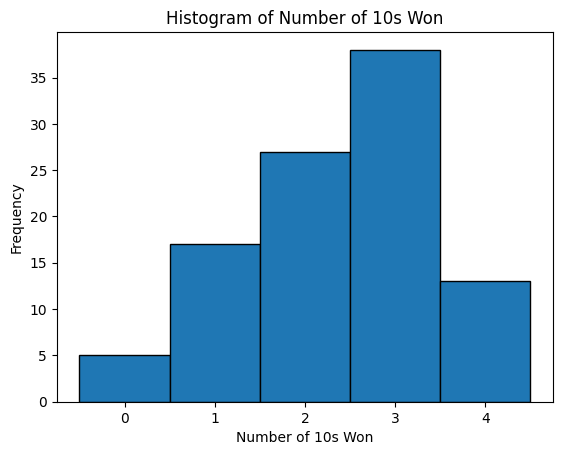

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Run the agent 100 times and collect the number of 10s won
tens_won_list = []
for _ in range(100):
    env = CardGameEnv()
    obs = env.reset()
    done = False
    while not done:
        hand = obs['hand']
        action = max(hand, key=rank_of)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    tens_won_list.append(obs.get('tens_won', 0))

# Plot histogram of the number of 10s won
# Extract the number of 10s won by the current player (player 0) from the dictionaries
tens_won_player_0 = [tens_won[0] for tens_won in tens_won_list]

# Plot histogram of the number of 10s won by player 0
plt.hist(tens_won_player_0, bins=np.arange(-0.5, max(tens_won_player_0)+1.5, 1), edgecolor='black')
plt.title('Histogram of Number of 10s Won')
plt.xlabel('Number of 10s Won')
plt.ylabel('Frequency')
plt.show()

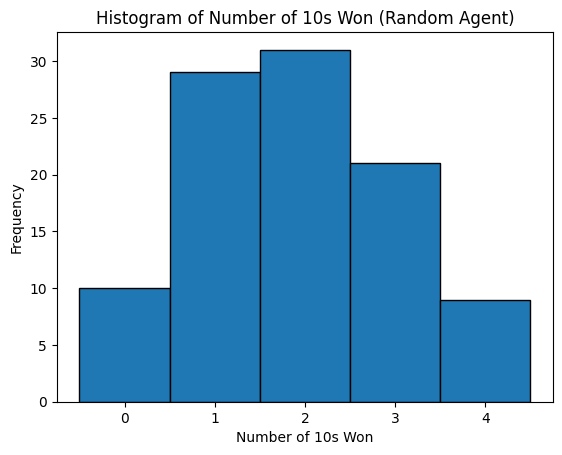

In [6]:
import random

# Run the random agent 100 times and collect the number of 10s won
random_tens_won_list = []
for _ in range(100):
    env = CardGameEnv()
    obs = env.reset()
    done = False
    while not done:
        hand = obs['hand']
        action = random.choice(hand)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    random_tens_won_list.append(obs.get('tens_won', 0))

# Extract the number of 10s won by the current player (player 0) from the dictionaries
random_tens_won_player_0 = [tens_won[0] for tens_won in random_tens_won_list]

# Plot histogram of the number of 10s won by the random agent
plt.hist(random_tens_won_player_0, bins=np.arange(-0.5, max(random_tens_won_player_0)+1.5, 1), edgecolor='black')
plt.title('Histogram of Number of 10s Won (Random Agent)')
plt.xlabel('Number of 10s Won')
plt.ylabel('Frequency')
plt.show()